<a href="https://colab.research.google.com/github/rsivs/MachineHack/blob/master/pregnancy_risk_prediction_multiclass_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [ ]:
# Load the data
baby_data_clf=pd.read_csv('baby-weights-dataset2.csv') 


In [ ]:
print(baby_data_clf.head(2))

     ID  SEX  MARITAL  FAGE  GAINED  ...  PRETERM  RENAL  RHSEN  UTERINE  BWEIGHT
0  2001    2        1    33      26  ...        0      0      0        0   4.3750
1  2002    2        2    19      40  ...        0      0      0        0   6.9375

[2 rows x 37 columns]


In [ ]:
def process_bweight(x):
  if x > 5.5:
    return 0
  elif x < 3.5:
    return 2 
  else:
    return 1 

baby_data_clf["BWEIGHT"] = baby_data_clf["BWEIGHT"].apply(lambda x : process_bweight(x))

In [ ]:
print(baby_data_clf.head(10))

     ID  SEX  MARITAL  FAGE  GAINED  ...  PRETERM  RENAL  RHSEN  UTERINE  BWEIGHT
0  2001    2        1    33      26  ...        0      0      0        0        1
1  2002    2        2    19      40  ...        0      0      0        0        0
2  2003    2        1    33      16  ...        0      0      0        0        0
3  2004    1        1    25      40  ...        0      0      0        0        0
4  2005    1        2    21      60  ...        0      0      0        0        0
5  2006    1        1    21      30  ...        0      0      0        0        0
6  2007    1        2    29      20  ...        0      0      0        0        0
7  2008    2        2    23      41  ...        0      0      0        0        0
8  2009    2        1    27       0  ...        0      0      0        0        0
9  2010    1        1    30      30  ...        0      0      0        0        0

[10 rows x 37 columns]


In [ ]:
y_data = baby_data_clf["BWEIGHT"]
x_data = baby_data_clf.drop(['ID', 'BWEIGHT', 'SEX','WEEKS'], axis=1)

In [ ]:
x_data_dummies = pd.get_dummies(data=x_data, columns=['HISPMOM', 'HISPDAD'])

In [ ]:
x_data_dummies.head()

,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,RACEMOM,RACEDAD,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,HISPMOM_C,HISPMOM_M,HISPMOM_N,HISPMOM_O,HISPMOM_P,HISPMOM_S,HISPMOM_U,HISPDAD_C,HISPDAD_M,HISPDAD_N,HISPDAD_O,HISPDAD_P,HISPDAD_S,HISPDAD_U
0,1,33,26,10,34,12,4,2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,2,19,40,10,18,11,12,1,0,0,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,33,16,14,31,16,16,2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,25,40,15,28,12,12,3,0,0,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,2,21,60,13,20,12,14,2,0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_data_dummies, y_data, train_size=0.8, stratify = y_data, random_state=100)

In [ ]:
from imblearn.combine import SMOTEENN

counter = Counter(y_data)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_smenn, y_smenn = smenn.fit_resample(x_data_dummies, y_data)

counter = Counter(y_smenn)
print('After',counter)

Before Counter({0: 93242, 1: 6464, 2: 1694})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

After Counter({2: 92047, 1: 86976, 0: 51148})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_smenn)

[[ 1 33 16 ...  0  0  0]
 [ 1 25 40 ...  0  0  0]
 [ 1 21 30 ...  0  0  0]
 ...
 [ 2 36 40 ...  0  0  0]
 [ 1 27 20 ...  0  0  0]
 [ 1 26 29 ...  0  0  0]]


In [ ]:
list(X_train.columns) 

['MARITAL',
 'FAGE',
 'GAINED',
 'VISITS',
 'MAGE',
 'FEDUC',
 'MEDUC',
 'TOTALP',
 'BDEAD',
 'TERMS',
 'LOUTCOME',
 'RACEMOM',
 'RACEDAD',
 'CIGNUM',
 'DRINKNUM',
 'ANEMIA',
 'CARDIAC',
 'ACLUNG',
 'DIABETES',
 'HERPES',
 'HYDRAM',
 'HEMOGLOB',
 'HYPERCH',
 'HYPERPR',
 'ECLAMP',
 'CERVIX',
 'PINFANT',
 'PRETERM',
 'RENAL',
 'RHSEN',
 'UTERINE',
 'HISPMOM_C',
 'HISPMOM_M',
 'HISPMOM_N',
 'HISPMOM_O',
 'HISPMOM_P',
 'HISPMOM_S',
 'HISPMOM_U',
 'HISPDAD_C',
 'HISPDAD_M',
 'HISPDAD_N',
 'HISPDAD_O',
 'HISPDAD_P',
 'HISPDAD_S',
 'HISPDAD_U']

In [ ]:
column_names = ['MARITAL',
 'FAGE',
 'GAINED',
 'VISITS',
 'MAGE',
 'FEDUC',
 'MEDUC',
 'TOTALP',
 'BDEAD',
 'TERMS',
 'LOUTCOME',
 'RACEMOM',
 'RACEDAD',
 'CIGNUM',
 'DRINKNUM',
 'ANEMIA',
 'CARDIAC',
 'ACLUNG',
 'DIABETES',
 'HERPES',
 'HYDRAM',
 'HEMOGLOB',
 'HYPERCH',
 'HYPERPR',
 'ECLAMP',
 'CERVIX',
 'PINFANT',
 'PRETERM',
 'RENAL',
 'RHSEN',
 'UTERINE',
 'HISPMOM_C',
 'HISPMOM_M',
 'HISPMOM_N',
 'HISPMOM_O',
 'HISPMOM_P',
 'HISPMOM_S',
 'HISPMOM_U',
 'HISPDAD_C',
 'HISPDAD_M',
 'HISPDAD_N',
 'HISPDAD_O',
 'HISPDAD_P',
 'HISPDAD_S',
 'HISPDAD_U']

In [ ]:
# creating the dataframe 
X_bal = pd.DataFrame(data = X_smenn,columns = column_names) 

In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X_bal, y_smenn, train_size=0.9, stratify = y_smenn, random_state=100)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(booster = "gbtree", objective = "multi:softprob", num_class = 3, eval_metric = "mae") 

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score

xgbmodel = XGBClassifier(objective = "multi:softprob", num_class = 3) 

param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(xgbmodel, param_distributions = param_dist, n_iter = 25, scoring = 'f1', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

estimators = []
results = np.zeros(len(X_bal))
score = 0.0
for train_index, test_index in folds.split(X_bal):
    clf.fit(X_train, y_train)

    estimators.append(clf.best_estimator_)
    results[test_index] = clf.predict(X_test)
    score += f1_score(y_test, results[test_index])

score /= numFolds

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: ignored

In [ ]:
y_pred = model.predict(X_test) 

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.28%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.54      0.61      5115
           1       0.55      0.62      0.58      8698
           2       0.70      0.69      0.69      9205

    accuracy                           0.63     23018
   macro avg       0.65      0.62      0.63     23018
weighted avg       0.64      0.63      0.63     23018



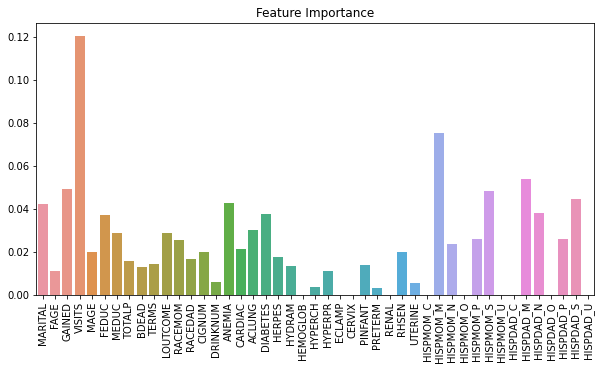

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=column_names, y=model.feature_importances_)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()

In [ ]:
import itertools
class_names = ['Low Risk','Medium Risk','High Risk']
matrix = confusion_matrix(y_test,y_pred)
   
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

**SVM Classifier OneVsOne**

In [ ]:
# SVM for multi-class classification using one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
# define model
model = SVC(kernel='linear')
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X_train, y_train)


In [ ]:
# make predictions
y_pred = ovo.predict(X_test) 

In [ ]:
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.95%


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18648
           1       0.00      0.00      0.00      1293
           2       0.00      0.00      0.00       339

    accuracy                           0.92     20280
   macro avg       0.31      0.33      0.32     20280
weighted avg       0.85      0.92      0.88     20280



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

In [ ]:
# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(ovo.estimator.coef_[0]), column_names, top=10)

**Decision Tree Classifier**

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24

In [ ]:
bbc.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                class_weight=None,
                                                                criterion='gini',
                                                                max_depth=None,
                                                                max_features=None,
                                                                max_leaf_nodes=None,
                                                                min_impurity_decrease=0.0,
                                                                min_impurity_split=None,
                                                                min_samples_leaf=1,
                                                                min_samples_split=2,
                                                                min_weight_fraction_leaf=0.0,
                                                                p

In [ ]:
print(preds)

[0 1 0 ... 1 0 0]


In [ ]:
preds = bbc.predict(X_test)
predictions = [round(value) for value in preds]

accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.77%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5115
           1       0.95      0.95      0.95      8698
           2       0.98      0.99      0.99      9205

    accuracy                           0.96     23018
   macro avg       0.95      0.95      0.95     23018
weighted avg       0.96      0.96      0.96     23018



In [ ]:
feature_importance = np.mean([
    tree.feature_importances for tree in bbc.estimators_
], axis=0)
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=column_names, y=feature_importances)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()

**OneVsREST XGB Classifier**


In [ ]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(np.array(X_train), y_train)

In [ ]:
#Validate the trained model and predict the results
preds = xgb_classifier.predict(X_test)
predictions = [round(value) for value in preds]

accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
#Display the evaluation report
print(classification_report(y_test, predictions))